## Installing and Importing Libraries

In [1]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

## Authentication fot Twitter API

In [2]:
import Secret_Key

consumerKey = Secret_Key.consumerKey
consumerSecret = Secret_Key.consumerSecret
accessToken = Secret_Key.accessToken
accessTokenSecret = Secret_Key.accessTokenSecret
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth, wait_on_rate_limit=True)

## Getting Tweets With Keyword or Hashtag

In [3]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search_tweets , q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
 
for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: covid
Please enter how many tweets to analyze: 2000


### Number of Tweets (Total, Positive, Negative, Neutral)

In [4]:
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  2000
positive number:  561
negative number:  491
neutral number:  948


In [5]:
tweet_list

,0
0,RT @CharlieCrist: I wish Ron DeSantis fought a...
1,RT @ajlamesa: This story is shocking and scary...
2,"RT @DrEliDavid: “When people are vaccinated, t..."
3,RT @BeingCharisBlog: 2. It's not just about yo...
4,RT @johnrich: If Dr Fauci winds up having a ha...
...,...
1995,Un menorquí demana pel certificat Covid al Min...
1996,LE DR.FAUCI QUI DÉCLARAIT QU’ON ÉTAIT PROTÉGÉ ...
1997,RT @PanickedFoodie: A gentle reminder that if ...
1998,"Waspada Varian Baru Covid-19, Dinkes Bandung I..."


## Creating PieCart

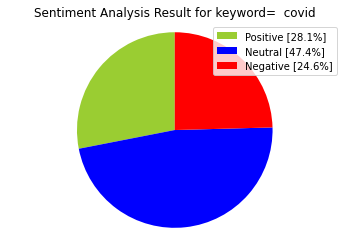

In [6]:
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

## Cleaning Tweets to Analyse Sentiment

In [7]:
tweet_list.drop_duplicates(inplace = True)

tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,RT @CharlieCrist: I wish Ron DeSantis fought a...,RT @CharlieCrist: I wish Ron DeSantis fought a...
1,RT @ajlamesa: This story is shocking and scary...,RT @ajlamesa: This story is shocking and scary...
2,"RT @DrEliDavid: “When people are vaccinated, t...","RT @DrEliDavid: “When people are vaccinated, t..."
3,RT @BeingCharisBlog: 2. It's not just about yo...,RT @BeingCharisBlog: 2. It's not just about yo...
4,RT @johnrich: If Dr Fauci winds up having a ha...,RT @johnrich: If Dr Fauci winds up having a ha...
...,...,...
1993,RT @NarayanaDiagno2: As the Covid cases are ri...,RT @NarayanaDiagno2: As the Covid cases are ri...
1995,Un menorquí demana pel certificat Covid al Min...,Un menorquí demana pel certificat Covid al Min...
1996,LE DR.FAUCI QUI DÉCLARAIT QU’ON ÉTAIT PROTÉGÉ ...,LE DR.FAUCI QUI DÉCLARAIT QU’ON ÉTAIT PROTÉGÉ ...
1998,"Waspada Varian Baru Covid-19, Dinkes Bandung I...","Waspada Varian Baru Covid-19, Dinkes Bandung I..."


In [8]:
tweet_list

,0,text
0,RT @CharlieCrist: I wish Ron DeSantis fought a...,RT @CharlieCrist: I wish Ron DeSantis fought a...
1,RT @ajlamesa: This story is shocking and scary...,RT @ajlamesa: This story is shocking and scary...
2,"RT @DrEliDavid: “When people are vaccinated, t...","RT @DrEliDavid: “When people are vaccinated, t..."
3,RT @BeingCharisBlog: 2. It's not just about yo...,RT @BeingCharisBlog: 2. It's not just about yo...
4,RT @johnrich: If Dr Fauci winds up having a ha...,RT @johnrich: If Dr Fauci winds up having a ha...
...,...,...
1993,RT @NarayanaDiagno2: As the Covid cases are ri...,RT @NarayanaDiagno2: As the Covid cases are ri...
1995,Un menorquí demana pel certificat Covid al Min...,Un menorquí demana pel certificat Covid al Min...
1996,LE DR.FAUCI QUI DÉCLARAIT QU’ON ÉTAIT PROTÉGÉ ...,LE DR.FAUCI QUI DÉCLARAIT QU’ON ÉTAIT PROTÉGÉ ...
1998,"Waspada Varian Baru Covid-19, Dinkes Bandung I...","Waspada Varian Baru Covid-19, Dinkes Bandung I..."


## Cleaning Text (RT, Punctuation etc)

In [9]:
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @CharlieCrist: I wish Ron DeSantis fought a...,i wish ron desantis fought against covid as h...
1,RT @ajlamesa: This story is shocking and scary...,this story is shocking and scary unvaccinate...
2,"RT @DrEliDavid: “When people are vaccinated, t...",when people are vaccinated they can feel sa...
3,RT @BeingCharisBlog: 2. It's not just about yo...,2 it s not just about you you may be person...
4,RT @johnrich: If Dr Fauci winds up having a ha...,if dr fauci winds up having a hard time with ...
5,RT @LeBobophobe: Il y a des formes sévères de ...,il y a des formes s v res de covid chez les v...
6,RT @Globalbiosec: Tens of millions of American...,tens of millions of americans may already hav...
7,RT @OsmarTerra: Anthony Fauci testa + para COV...,anthony fauci testa para covid 19 autoridad...
8,RT @HAGnews2: The purposes for CCP to commit t...,the purposes for ccp to commit the series of ...
9,RT @idrissaberkane: Comment? Ce n’est donc pas...,comment ce n est donc pas le covid qui cause...


## Sentiment Analyse

In [10]:
# Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @CharlieCrist: I wish Ron DeSantis fought a...,i wish ron desantis fought against covid as h...,-0.002976,0.538690,negative,0.303,0.569,0.128,-0.4019
1,RT @ajlamesa: This story is shocking and scary...,this story is shocking and scary unvaccinate...,-0.555556,0.688889,negative,0.451,0.549,0.000,-0.9176
2,"RT @DrEliDavid: “When people are vaccinated, t...",when people are vaccinated they can feel sa...,0.363636,0.522727,positive,0.116,0.650,0.235,0.5106
3,RT @BeingCharisBlog: 2. It's not just about yo...,2 it s not just about you you may be person...,0.125000,0.375000,negative,0.180,0.820,0.000,-0.5267
4,RT @johnrich: If Dr Fauci winds up having a ha...,if dr fauci winds up having a hard time with ...,-0.095833,0.470833,negative,0.143,0.857,0.000,-0.3597
5,RT @LeBobophobe: Il y a des formes sévères de ...,il y a des formes s v res de covid chez les v...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
6,RT @Globalbiosec: Tens of millions of American...,tens of millions of americans may already hav...,-0.050000,0.400000,negative,0.116,0.884,0.000,-0.3612
7,RT @OsmarTerra: Anthony Fauci testa + para COV...,anthony fauci testa para covid 19 autoridad...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
8,RT @HAGnews2: The purposes for CCP to commit t...,the purposes for ccp to commit the series of ...,-0.483333,0.533333,negative,0.255,0.664,0.081,-0.6908
9,RT @idrissaberkane: Comment? Ce n’est donc pas...,comment ce n est donc pas le covid qui cause...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000


In [11]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"] 

In [12]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [13]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,637,46.67
positive,369,27.03
negative,359,26.30


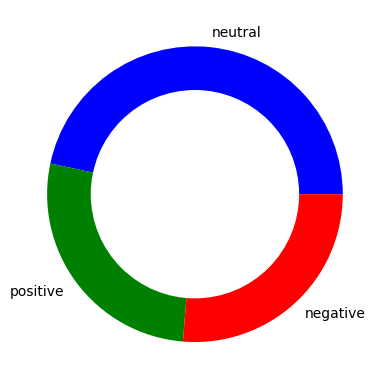

In [14]:
# create data for Pie Chart
piechart = count_values_in_column(tw_list,"sentiment")
names= piechart.index
size=piechart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['blue','green','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

## Function to Create Wordcloud

In [15]:
def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


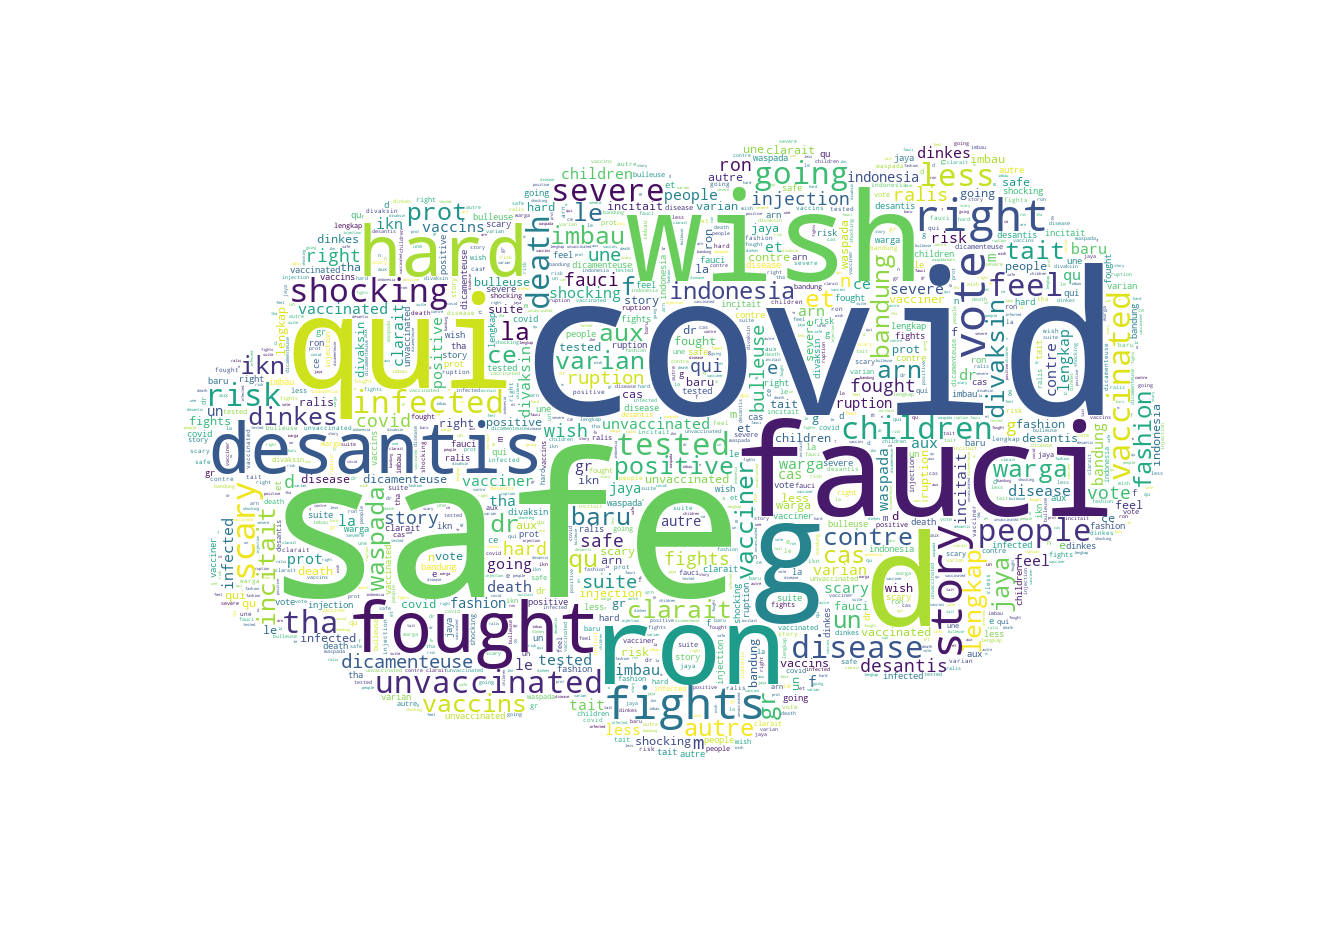

In [16]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


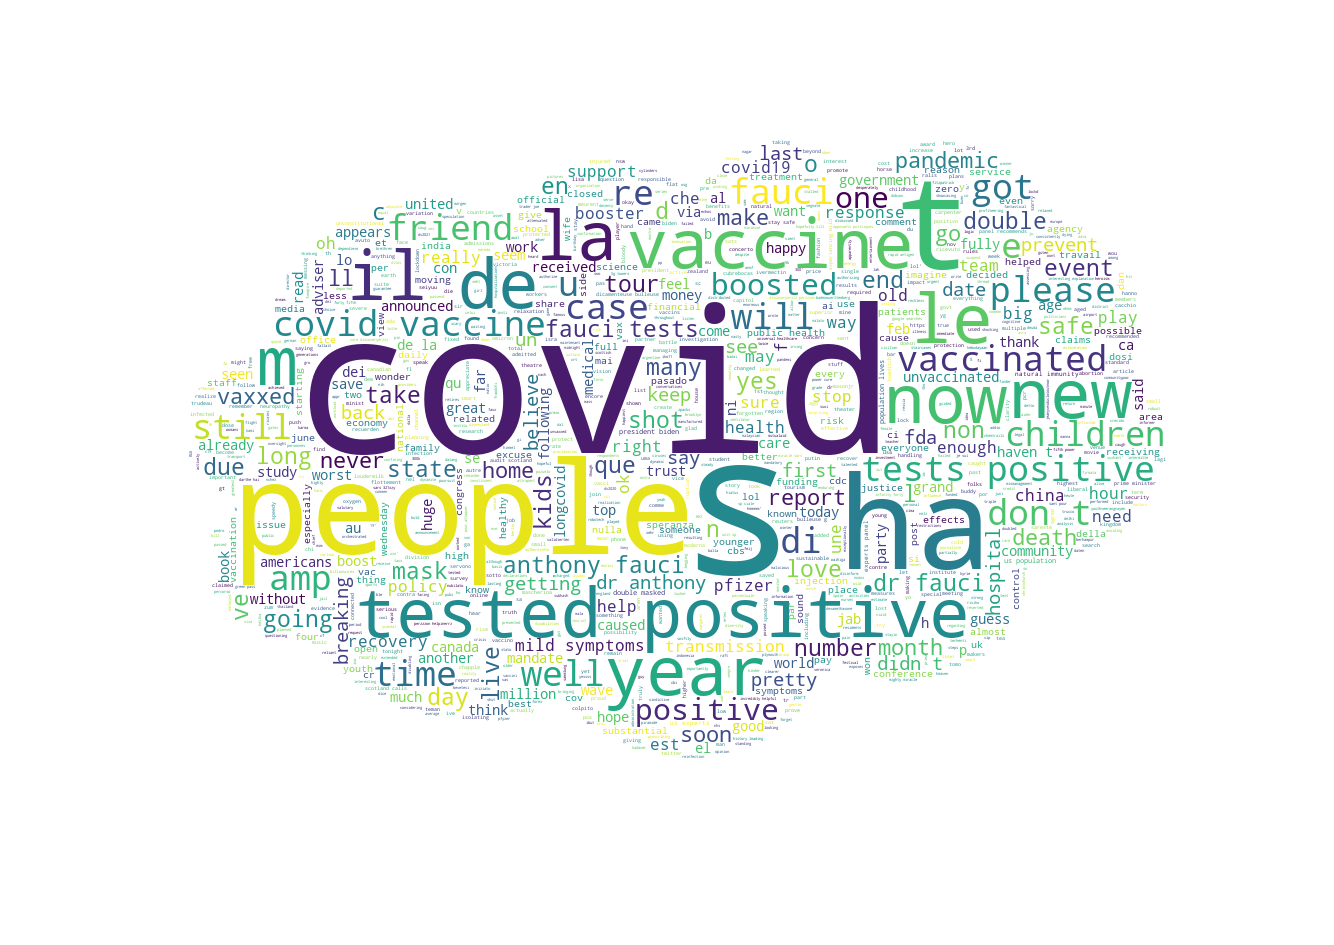

In [17]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


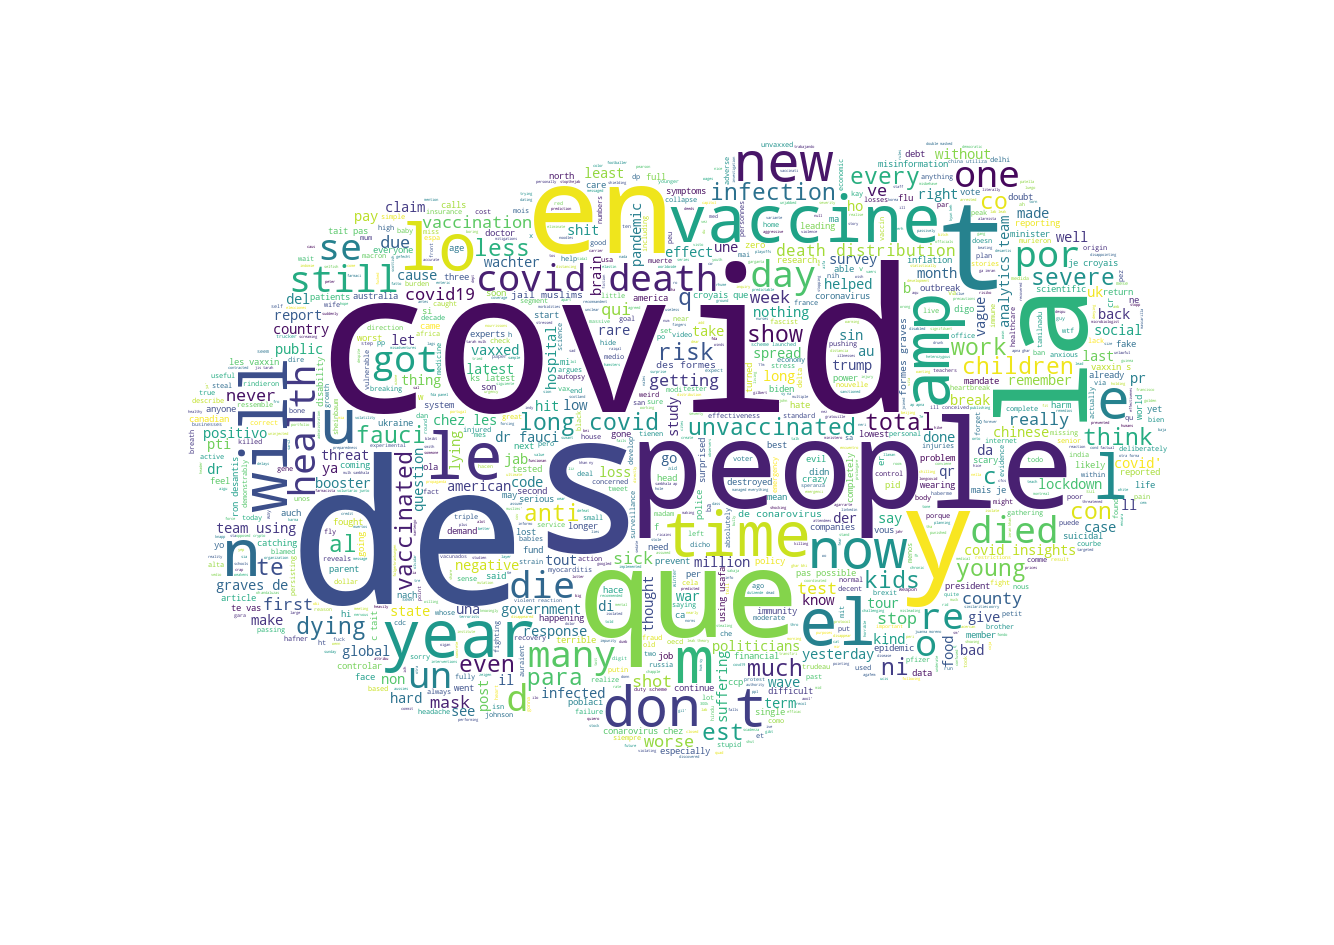

In [18]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)